In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [18]:
# Import data
df = pd.read_csv("medical_examination.csv")

In [19]:
# Add 'overweight' column
df['overweight'] = (df['weight']  / (df['height']/100)**2).apply(lambda x : 1 if x > 25 else 0)

In [20]:
df['cholesterol'] = np.where(df['cholesterol'] == 1, 0, 1)
df['gluc'] = np.where(df['gluc'] == 1, 0, 1)

In [21]:
df_cat = pd.melt(df,id_vars='cardio', value_vars=['active','alco','cholesterol','gluc','overweight','smoke'])

In [22]:
df_cat

,cardio,variable,value
0,0,active,1
1,1,active,1
2,1,active,0
3,1,active,1
4,0,active,0
...,...,...,...
419995,0,smoke,1
419996,1,smoke,0
419997,1,smoke,0
419998,1,smoke,0


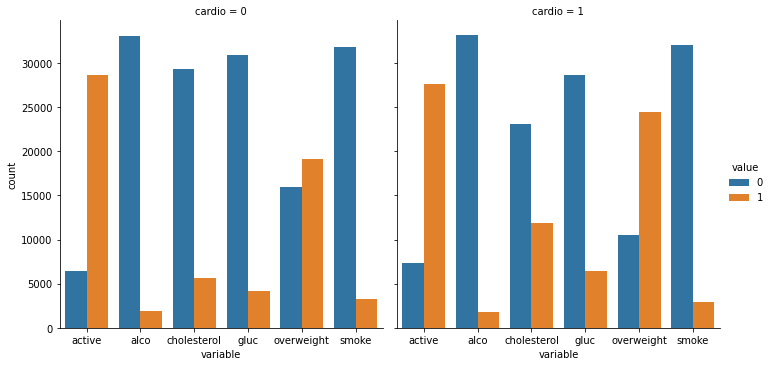

In [23]:
sns.catplot(data=df_cat,kind='count',x='variable',hue='value',col='cardio')

In [24]:
df_heat = df[
    (df['ap_lo'] <= df['ap_hi']) & 
    (df['height'] >= (df['height'].quantile(0.025))) &
    (df['height'] <= (df['height'].quantile(0.975))) &
    (df['weight'] >= (df['weight'].quantile(0.025))) &
    (df['weight'] <= (df['weight'].quantile(0.975)))
    ]

In [25]:
corr = df_heat.corr()

In [26]:
mask = np.triu(corr)

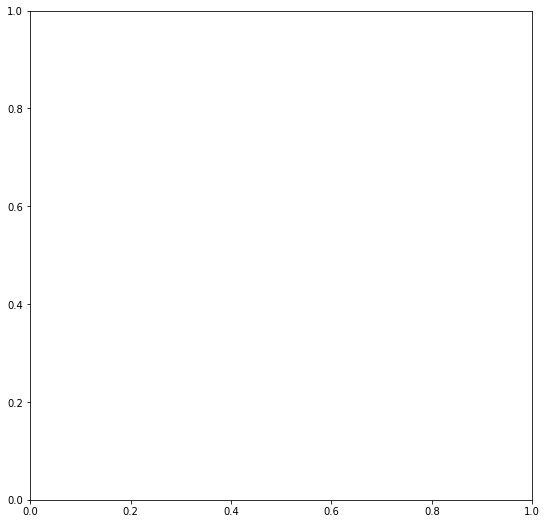

In [27]:
fig, ax = plt.subplots(figsize=(9,9))

<AxesSubplot:>

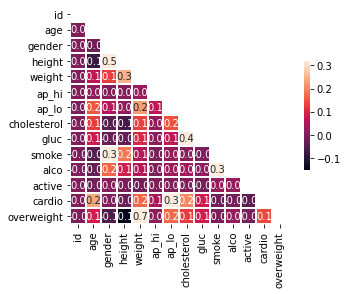

In [28]:
sns.heatmap(
        corr,
        annot=True,
        fmt='.1f',
        linewidths=1,
        mask=mask,
        vmax=.32,
        cbar_kws={'shrink': 0.5},
        square=True)

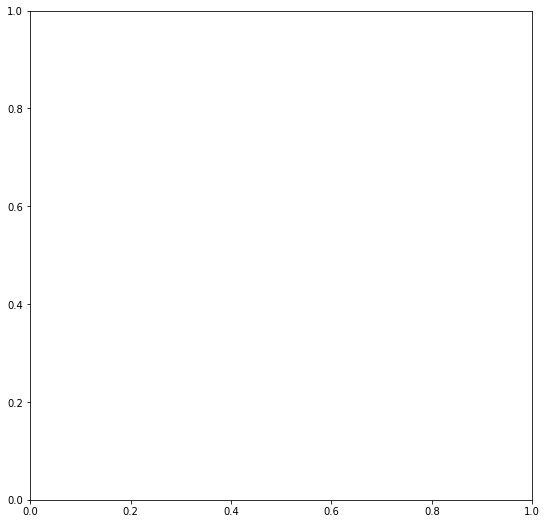

In [29]:
fig